# 1 - Analysis of the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### 1.1 - Loading the dataset

In [2]:
df = pd.read_csv("Tweets.csv")

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.shape

(14640, 15)

In [4]:
df[df["tweet_id"] == 570307948171423745]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11882,570307948171423745,negative,0.6846,Flight Booking Problems,0.6846,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I pay $200 to reactivat...,NaN,2015-02-24 11:43:05 -0800,NaN,Quito
12043,570307948171423745,negative,1.0000,Can't Tell,0.6758,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I pay $200 to reactivat...,NaN,2015-02-24 11:43:05 -0800,NaN,Quito


So, the dataset contains 14640 entries and has 15 columns. The ones that we are interested in are "airline_sentiment" and "text". It represents the sentiment felt by the author of the tweet about US Airlines, 3 possible cases : positive, neutral, negative. At first glance, I do not think that the other columns are relevant in our project as we do not want the model to overfit on for instance Twitter's username or airline.

#### Removing duplications

In [5]:
df[df.duplicated(subset=["tweet_id"], keep=False)].sort_values(by="tweet_id")

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12033,569600137296633856,positive,0.9236,NaN,0.0000,American,positive,douglaskgordon,NaN,0,@AmericanAir Thank you.....you do the same!!,NaN,2015-02-22 12:50:30 -0800,"Caribbean, New York and Miami.",Indiana (East)
14556,569600137296633856,positive,1.0000,NaN,NaN,American,NaN,douglaskgordon,NaN,0,@AmericanAir Thank you.....you do the same!!,NaN,2015-02-22 12:50:30 -0800,"Caribbean, New York and Miami.",Indiana (East)
14543,569601363799359488,negative,1.0000,Flight Attendant Complaints,1.0000,American,NaN,stevereasnors,NaN,0,@AmericanAir should reconsider #usairways acqu...,NaN,2015-02-22 12:55:22 -0800,Los Angeles,Pacific Time (US & Canada)
12032,569601363799359488,negative,0.9553,Flight Attendant Complaints,0.9553,American,negative,stevereasnors,Flight Attendant Complaints,0,@AmericanAir should reconsider #usairways acqu...,NaN,2015-02-22 12:55:22 -0800,Los Angeles,Pacific Time (US & Canada)
12031,569621879633391616,negative,1.0000,Customer Service Issue,1.0000,American,negative,salitron78,Customer Service Issue,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12042,570307949614256128,negative,1.0000,Can't Tell,1.0000,American,NaN,ELLLORRAC,NaN,0,@AmericanAir thanks for getting back to me. Bu...,NaN,2015-02-24 11:43:05 -0800,NaN,Central Time (US & Canada)
11880,570308064185880577,neutral,0.6667,NaN,NaN,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangem...,NaN,2015-02-24 11:43:32 -0800,NaN,NaN
12041,570308064185880577,neutral,0.6755,NaN,0.0000,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangem...,NaN,2015-02-24 11:43:32 -0800,NaN,NaN
12040,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito


Thanks to the "tweet_id", we can see that we have duplications. Exactly, 155 duplications.

In [6]:
df.drop_duplicates(subset=["tweet_id"], keep="first", inplace=True)


In [7]:
df[df.duplicated(subset=["tweet_id"], keep=False)]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [8]:
assert(df.shape == (14640-155, 15)), "The shape of the df without duplication is incorrect."
df.shape

(14485, 15)

#### 1.2 - Frequencies of sentiments in the dataset

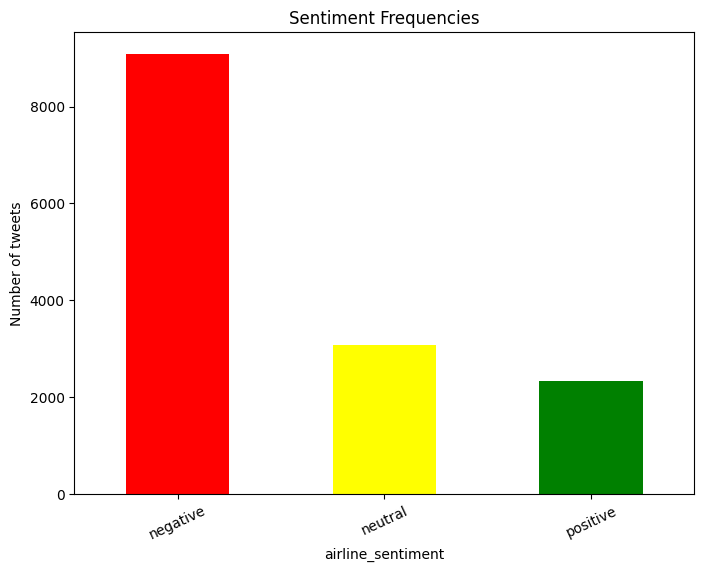

In [9]:
sentiment_counts = df['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Sentiment Frequencies')
plt.ylabel('Number of tweets')
plt.xticks(rotation=25)
plt.show()

In [10]:
for sentiment, count in sentiment_counts.items():
    print(f"There are {count} tweets with {sentiment} sentiment.")

There are 9082 tweets with negative sentiment.
There are 3069 tweets with neutral sentiment.
There are 2334 tweets with positive sentiment.


As we see, there are a lot of negative tweets about airlines, I think it is pretty normal as people are mostlikely going to say something when it is bad then when it is good. When it is good, it is "normal" for the passenger and does not require to say anything about it. But when it is really really good, they are going to say it. It is the negativity bias (tendency for humans to pay more attention to negative events or experiences compared to positive ones)

For the neutral ones, I do not really know if the dataset is mislabeled. I will try to read some of them later to check.

#### 1.3 - Frequencies of negative sentiment by Airlines

For fun, let's see which company has the most negative tweets. 

In [11]:
sentiment_by_company = df.groupby(['airline', 'airline_sentiment']).size().unstack()

sentiment_by_company

airline_sentiment,negative,neutral,positive
airline,,,
American,1864,433,307
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


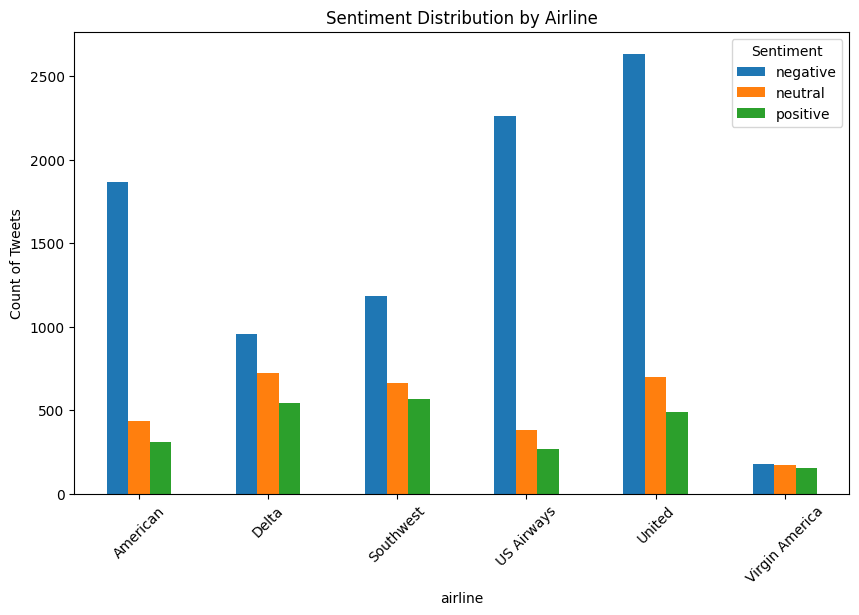

In [12]:
sentiment_by_company.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Sentiment Distribution by Airline')
plt.ylabel('Count of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [13]:
negative_tweets_by_company = sentiment_by_company["negative"]
total_tweets_by_company = sentiment_by_company.sum(axis=1)
negative_tweet_rate = (negative_tweets_by_company / total_tweets_by_company).sort_values(ascending=False)

print("Rate of Negative Tweets by Companies:")
print(negative_tweet_rate)

Rate of Negative Tweets by Companies:
airline
US Airways        0.776862
American          0.715822
United            0.688906
Southwest         0.490083
Delta             0.429793
Virgin America    0.359127
dtype: float64


We can see that passengers seem to not like US Airways, American Airlines, United Airlines. Delta Airlines seems to be less hated. About Virgin America, we can't really say anything as there are only around 500 tweets about this company.

#### 1.3 - Length of tweets

In [14]:
negative_lengths = df[df['airline_sentiment'] == 'negative']['text'].str.len()
negative_lengths.mean()

113.93536665932614

In [15]:
negative_word_counts = df[df['airline_sentiment'] == 'negative']['text'].str.split().apply(len)
negative_word_counts.mean()

19.689385597885927

In [16]:
positive_lengths = df[df['airline_sentiment'] == 'positive']['text'].str.len()
positive_lengths.mean()

86.29134532990574

In [17]:
positive_word_counts = df[df['airline_sentiment'] == 'positive']['text'].str.split().apply(len)
positive_word_counts.mean()

14.050985432733505

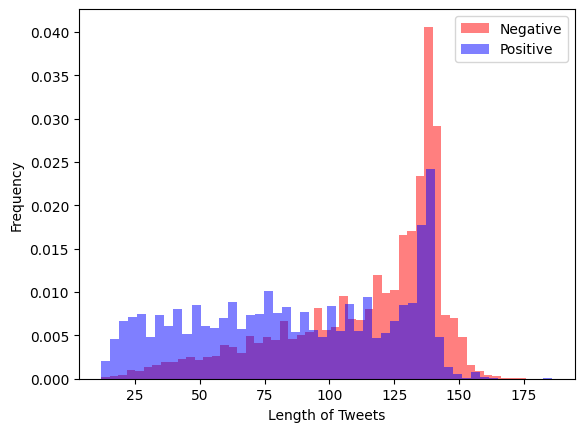

In [18]:
plt.hist(negative_lengths, bins=50, color='red', alpha=0.5, label='Negative', density=True)
plt.hist(positive_lengths, bins=50, color='blue', alpha=0.5, label='Positive', density=True)
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')
plt.legend()
plt.show()

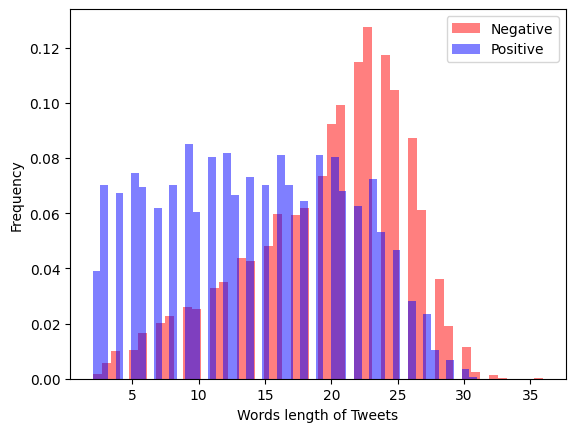

In [19]:
plt.hist(negative_word_counts, bins=50, color='red', alpha=0.5, label='Negative', density=True)
plt.hist(positive_word_counts, bins=50, color='blue', alpha=0.5, label='Positive', density=True)
plt.xlabel('Words length of Tweets')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can see that in average, negative tweets have 20 words for 114 characters and positive tweets have 14 words for 86 characters. We may use it as a feature in our model.

# 2 - Pre-processing

#### 2.1 - Removing the useless columns

In [20]:
df = df[["text", "airline_sentiment"]]
df.head(20)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


#### Converting emojis

For index 18, the emoji ❤️ is important because otherwise we can't understand the analysis of just "I flying". So, now we are going to try to take care of emojis / smileys first.

In [21]:
import emoji

print(emoji.demojize(df.iloc[18]["text"]))

I :red_heart: flying @VirginAmerica. :smiling_face::thumbs_up:


In [22]:
df['preprocessed_text'] = df['text'].apply(emoji.demojize)
df.head(20)

,text,airline_sentiment,preprocessed_text
0,@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...,positive,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...,negative,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...,negative,@VirginAmerica and it's a really big bad thing...
5,@VirginAmerica seriously would pay $30 a fligh...,negative,@VirginAmerica seriously would pay $30 a fligh...
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,@VirginAmerica Really missed a prime opportuni...,neutral,@VirginAmerica Really missed a prime opportuni...
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,"@VirginAmerica it was amazing, and arrived an ...",positive,"@VirginAmerica it was amazing, and arrived an ..."


#### 2.2 - Tokenization and removing stopwords, symbols and company's name

In [24]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy

nlp = spacy.load("en_core_web_sm")


def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove the first "@" symbol and the company name
    if "@" in tokens:
        index = tokens.index("@")  
        del tokens[index]  
        if index < len(tokens):
            del tokens[index]  
    
    # Remove stopwords and symbols (except for "@")
    stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalnum() or token.startswith('@')]

    # Lemmatize tokens using spaCy because NLTK is not good enough
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]
    
    return tokens

df['preprocessed_text'] = df['text'].apply(preprocess_text)
df.head(20)

UnboundLocalError: cannot access local variable 'pos_tags' where it is not associated with a value